In [50]:
import sklearn
from sklearn.datasets import load_breast_cancer
from sklearn.svm import SVC
from sklearn import metrics
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

In [3]:
file = load_breast_cancer()
dir(file)

['DESCR',
 'data',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [5]:
file.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [8]:
file.target_names

array(['malignant', 'benign'], dtype='<U9')

In [15]:
df = pd.DataFrame(file.data, columns=file.feature_names)
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [16]:
df['target'] = file.target
df['cancer_type'] = df.target.apply(lambda x: file.target_names[x])
df.head()


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target,cancer_type
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0,malignant
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0,malignant
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0,malignant
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0,malignant
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0,malignant


In [19]:
df[45:55]

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target,cancer_type
45,18.650,17.60,123.70,1076.0,0.10990,0.16860,0.19740,0.100900,0.1907,0.06049,...,150.60,1567.0,0.1679,0.50900,0.73450,0.23780,0.3799,0.09185,0,malignant
46,8.196,16.84,51.71,201.9,0.08600,0.05943,0.01588,0.005917,0.1769,0.06503,...,57.26,242.2,0.1297,0.13570,0.06880,0.02564,0.3105,0.07409,1,benign
47,13.170,18.66,85.98,534.6,0.11580,0.12310,0.12260,0.073400,0.2128,0.06777,...,102.80,759.4,0.1786,0.41660,0.50060,0.20880,0.3900,0.11790,0,malignant
48,12.050,14.63,78.04,449.3,0.10310,0.09092,0.06592,0.027490,0.1675,0.06043,...,89.88,582.6,0.1494,0.21560,0.30500,0.06548,0.2747,0.08301,1,benign
49,13.490,22.30,86.91,561.0,0.08752,0.07698,0.04751,0.033840,0.1809,0.05718,...,99.00,698.8,0.1162,0.17110,0.22820,0.12820,0.2871,0.06917,1,benign
50,11.760,21.60,74.72,427.9,0.08637,0.04966,0.01657,0.011150,0.1495,0.05888,...,82.98,516.5,0.1085,0.08615,0.05523,0.03715,0.2433,0.06563,1,benign
51,13.640,16.34,87.21,571.8,0.07685,0.06059,0.01857,0.017230,0.1353,0.05953,...,96.08,656.7,0.1089,0.15820,0.10500,0.08586,0.2346,0.08025,1,benign
52,11.940,18.24,75.71,437.6,0.08261,0.04751,0.01972,0.013490,0.1868,0.06110,...,83.67,527.2,0.1144,0.08906,0.09203,0.06296,0.2785,0.07408,1,benign
53,18.220,18.70,120.30,1033.0,0.11480,0.14850,0.17720,0.106000,0.2092,0.06310,...,135.10,1321.0,0.1280,0.22970,0.26230,0.13250,0.3021,0.07987,0,malignant
54,15.100,22.02,97.26,712.8,0.09056,0.07081,0.05253,0.033340,0.1616,0.05684,...,117.70,1030.0,0.1389,0.20570,0.27120,0.15300,0.2675,0.07873,0,malignant


In [35]:
scaler = MinMaxScaler()
df['mean radius'] = scaler.fit_transform(df[['mean radius']])
df['mean texture'] = scaler.fit_transform(df[['mean texture']])
df['mean area'] = scaler.fit_transform(df[['mean area']])
df['worst perimeter'] = scaler.fit_transform(df[['worst perimeter']])
df['worst area'] = scaler.fit_transform(df[['worst area']])

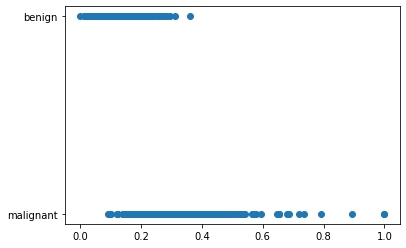

In [36]:
%matplotlib inline
plt.scatter(df['mean area'], df['cancer_type'])

In [37]:
X = df.drop(['cancer_type', 'target'], axis='columns')
y = df.target

In [65]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [49]:
from sklearn.svm import SVC
model = SVC()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.9473684210526315

In [54]:
y_pred = model.predict(X_test)
acc = metrics.accuracy_score(y_test, y_pred)
acc

0.9473684210526315

**Tune parameters**

*1. Regularization (C)*

In [58]:
model_C = SVC(C=3)
model_C.fit(X_train, y_train)
model_C.score(X_test, y_test)

0.9649122807017544

*2. Gamma*

In [66]:
model_g = SVC(gamma=10)
model_g.fit(X_train, y_train)
model_g.score(X_test, y_test)

0.631578947368421

*3. Kernel*

In [68]:
model_linear_kernal = SVC(kernel='linear')
model_linear_kernal.fit(X_train, y_train)

SVC(kernel='linear')

In [69]:
model_linear_kernal.score(X_test, y_test)

0.9298245614035088